# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [112]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
print(tf.__version__)


2.0.0


## Get Required Files from Drive

In [113]:
### Executing in local machine 
import os
os.getcwd() 

'/Users/abhinandanchiney/Desktop/AIML/res10/project'

In [114]:
#Set your project path 
project_path =  os.getcwd()
project_path

'/Users/abhinandanchiney/Desktop/AIML/res10/project'

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [115]:
df = pd.read_json(project_path+"//Sarcasm Detection//Data//Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [116]:
df.isna().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

There are no null or missing values in the dataset

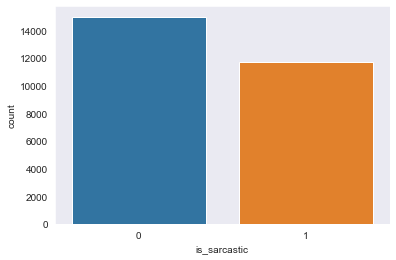

In [117]:

sns.countplot(df.is_sarcastic)

There are more non-sarcastic cases in the dataset. But the data is not unbalanced.

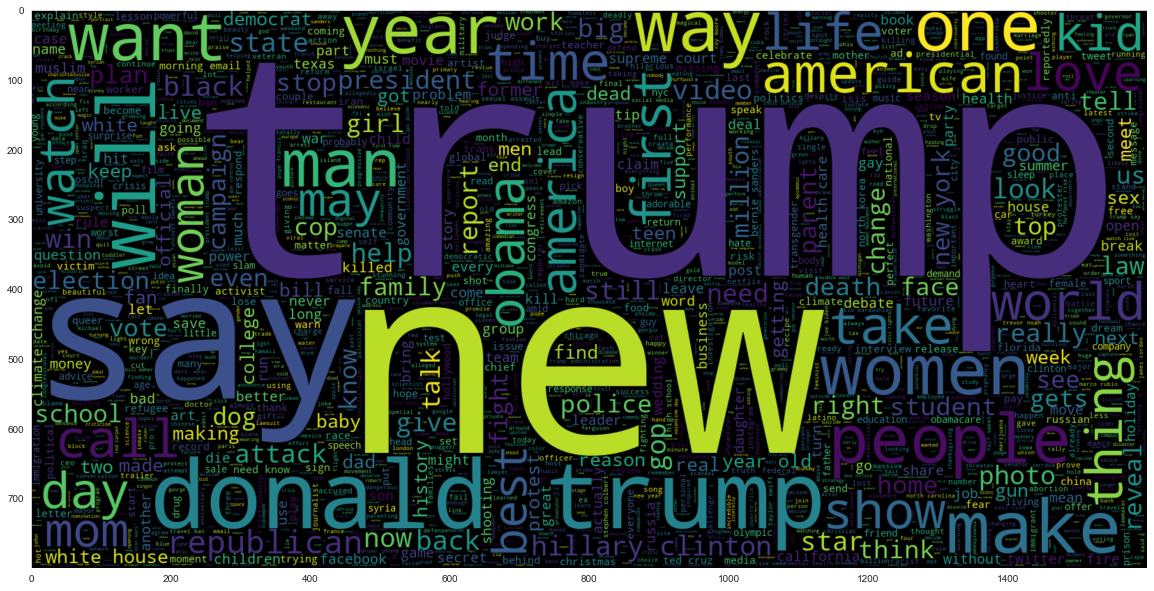

In [118]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

The word cloud above is for the non sarcastic statements. Donald trump seems to feature very prominently in the dataset. 

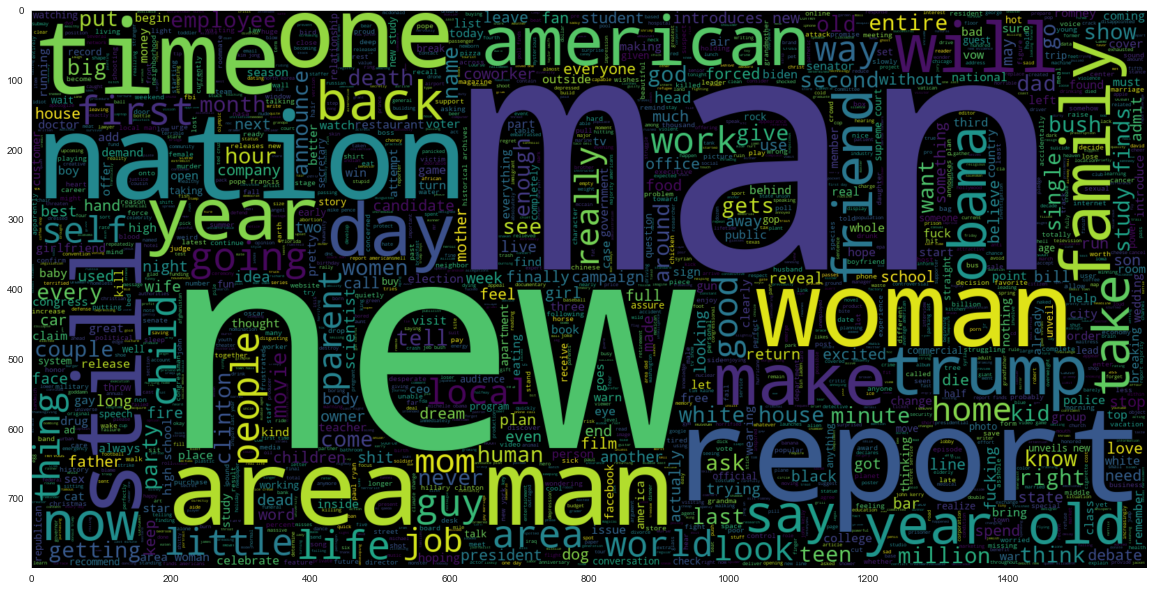

In [119]:
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

The above word cloud is for the sarcastic dataset. Nation, man and woman seem to feature a lot. The work "New" seems to be very common. "Woman" is common is both non sarcastic and sarcastic datasets.

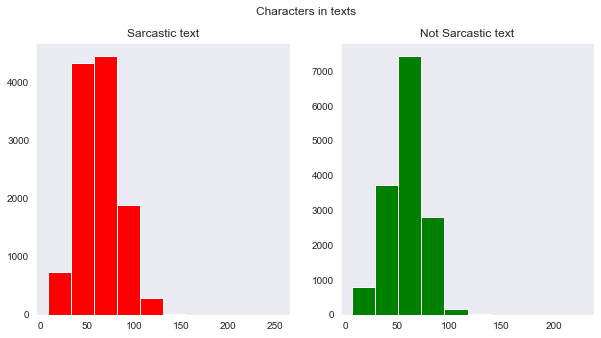

In [120]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text')
text_len=df[df['is_sarcastic']==0]['headline'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Characters in texts')
plt.show()

The sentences in sarcastic and non sarcastic cases have similar number of characters. 

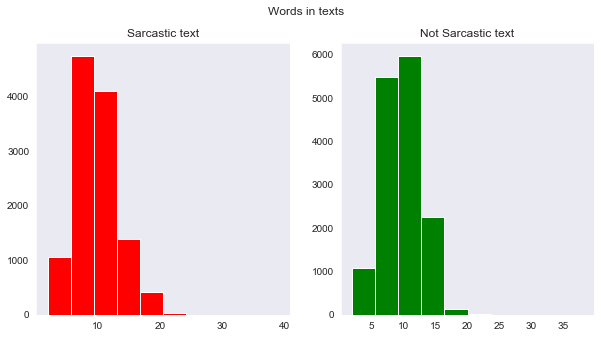

In [121]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text')
text_len=df[df['is_sarcastic']==0]['headline'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Words in texts')
plt.show()

There is also not much difference in number of words in the two cases. Though sarcastic texts have slightly less number of words. 

Text(0.5, 0.98, 'Average word length in each text')

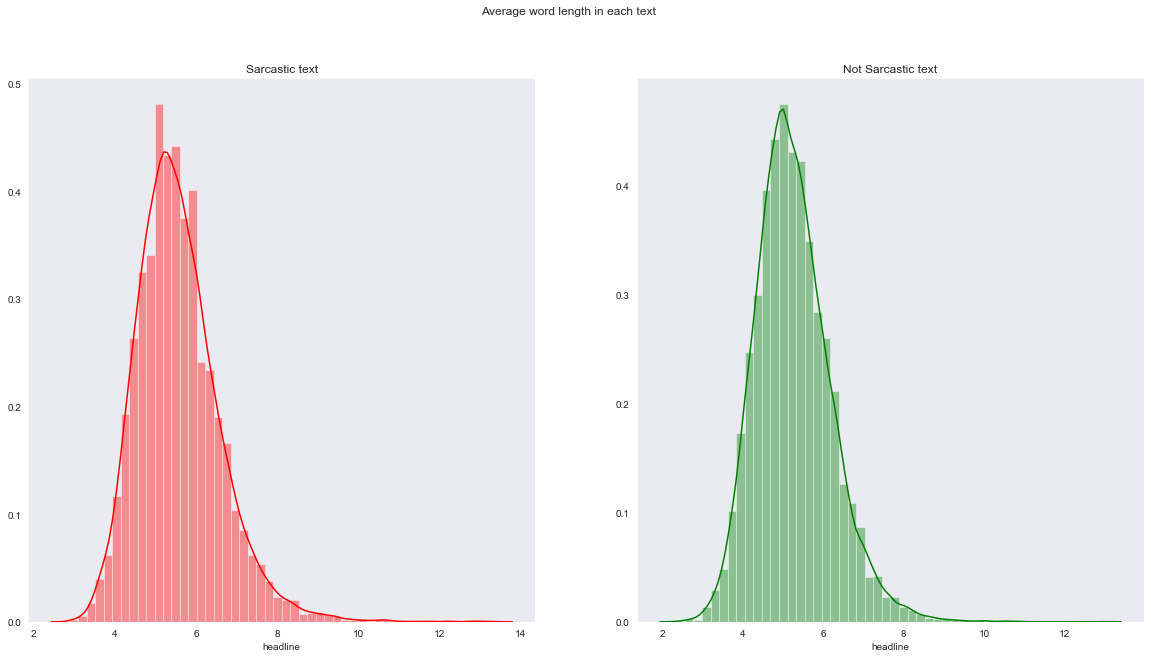

In [122]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['is_sarcastic']==1]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Sarcastic text')
word=df[df['is_sarcastic']==0]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Average word length in each text')

Very normal distributions for both cases 
Slight lower average words for sentence in sarcastic texts as compared to non sarcastic texts

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [123]:
df = df.drop("article_link", axis = 1)
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [124]:
length = df['headline'].apply(lambda x : len(x))
length

0        78
1        84
2        79
3        84
4        64
         ..
26704    36
26705    23
26706    21
26707    60
26708    33
Name: headline, Length: 26709, dtype: int64

Text(0.5, 1, 'Number of words in each headlines')

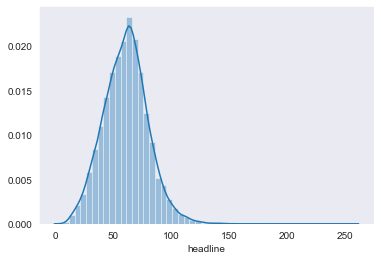

In [125]:
sns.distplot(length)
ax2.set_title('Number of words in each headlines')


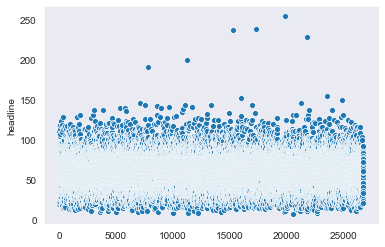

In [126]:
sns.scatterplot(x = np.arange(0,26709),y = length)

In [127]:
print("Maximum length of words in headlines is",max(length))

Maximum length of words in headlines is 254


#**## Modelling**

## Import required modules required for modelling.

In [128]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [129]:
max_features = 10000
maxlen = 25
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [130]:
token = Tokenizer(num_words=max_features)
token.fit_on_texts(df['headline'])

# Define X and y for your model.

In [131]:
X = token.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[1])
print("Number of Labels: ", len(y))
print(y[1])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    3 8434 3337
 2745   21    1  165 8435  415 3111    5  257    8 1001]
Number of Labels:  26709
0


In [132]:
X.shape

(26709, 25)

In [133]:
y.shape

(26709,)

In [134]:
X=X.reshape(len(X),maxlen)
from sklearn.model_selection import train_test_split
trainx, validx, trainy, validy = train_test_split(X, y, test_size=0.3,random_state=42 )

In [135]:
trainy=np.array(trainy)
validy=np.array(validy)

In [136]:
trainx.shape

(18696, 25)

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [137]:
vocab_size = len(token.word_index) + 1 #as index starts for 0, 1 is added
print(vocab_size)

29657


#**## Word Embedding**

## Get Glove Word Embeddings

In [138]:
glove_file = project_path + "//Sarcasm Detection//Data//glove.6B.zip"

In [139]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [140]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [141]:
embedding_matrix = np.zeros((vocab_size, 200))

for word, i in token.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [149]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))


#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=embedding_size, weights=[embedding_matrix], ))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

In [150]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 200)         5931400   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 6,268,553
Trainable params: 6,268,553
Non-trainable params: 0
_________________________________________________________________


# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [152]:
batch_size = 100
epochs = 5
checkpoint_filepath = project_path+'//model.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_acc',mode='max',save_best_only=True)
## Add your code here ##
history = model.fit(trainx, trainy, validation_data=(validx,validy), batch_size = batch_size , epochs = epochs, callbacks=[model_checkpoint_callback])


Train on 18696 samples, validate on 8013 samples
Epoch 1/5
18696/18696 [==============================] - 36s 2ms/sample - loss: 0.4347 - acc: 0.7932 - val_loss: 0.3109 - val_acc: 0.8675
Epoch 2/5
18696/18696 [==============================] - 32s 2ms/sample - loss: 0.2316 - acc: 0.9084 - val_loss: 0.3506 - val_acc: 0.8643
Epoch 3/5
18696/18696 [==============================] - 32s 2ms/sample - loss: 0.1472 - acc: 0.9431 - val_loss: 0.3906 - val_acc: 0.8600
Epoch 4/5
18696/18696 [==============================] - 32s 2ms/sample - loss: 0.0972 - acc: 0.9619 - val_loss: 0.5035 - val_acc: 0.8544
Epoch 5/5
18696/18696 [==============================] - 32s 2ms/sample - loss: 0.0702 - acc: 0.9734 - val_loss: 0.6113 - val_acc: 0.8497


In [154]:

print("Accuracy of the model on Testing Data is - " , model.evaluate(validx,validy)[1]*100)

8013/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy of the model on Testing Data is -  84.97441411018372


In [155]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [156]:
pred = model.predict_classes(validx)
print(classification_report(validy, pred, target_names = ['Not Sarcastic','Sarcastic']))

               precision    recall  f1-score   support

Not Sarcastic       0.89      0.84      0.86      4444
    Sarcastic       0.81      0.87      0.84      3569

     accuracy                           0.85      8013
    macro avg       0.85      0.85      0.85      8013
 weighted avg       0.85      0.85      0.85      8013



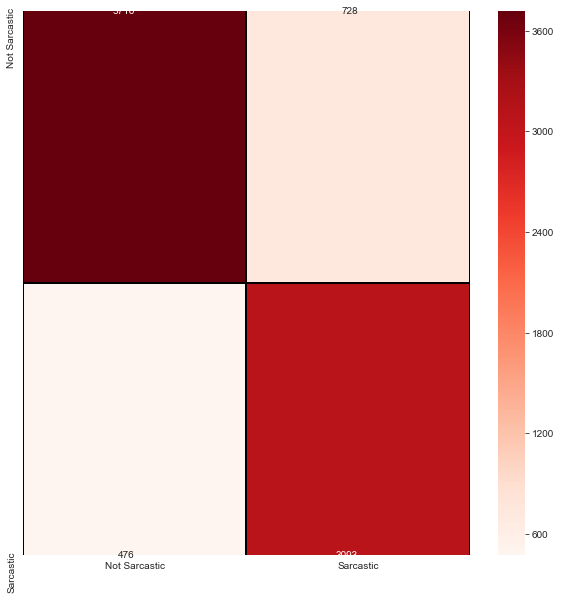

In [157]:
cmtrx = confusion_matrix(validy,pred)
cm = pd.DataFrame(cmtrx , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
akws = {"ha": 'right',"va": 'center'}
sns.heatmap(cm,cmap = 'Reds',linecolor = 'black' , linewidth = 1 , annot = True, annot_kws=akws, fmt = '', xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])